# Black-Scholes Option Pricing Model

**The [Black-Scholes or Black-Scholes-Merton](https://en.wikipedia.org/wiki/Black–Scholes_model) is mathematical model used in finance to determine the theorical price of European-style options.** The primary purpose of the model is to calculate the fair market value of an option taking into account five parameters: the current price and volatility of the underlying asset, the strike price and time until maturity of the option, and the risk-free interest rate.

# Pricing Options

**An option is a type of derivative asset that gives its owner (holder) the right, but not the obligation to buy (call option) or sell (put option) a specific quantity of an underlying asset at a specified strike price.** Options are generally used for three main purposes: speculation, hedge or arbitrage.

The task of predicting the future value of a asset has demonstrated to be very difficult. The price of an asset can depend on a countless number of variables. **Since the value of an option is tied to the future value of its underlying asset, options are equally very hard to be priced.**

That’s where the Black-Scholes-Merton model comes in. It has proved to be quite robust method of pricing these types of derivatives.

# Assumptions

 However, there are some caveats. The Black-Scholes model only works under a number of assumptions. These assumptions are related to the underlying asset, to the overall market and to the option itself.

## Assumptions about the Underlying Asset

### Random Walk

The foundational assumption of modern financial theory is that the direction of an asset’s price cannot be consistently predicted from its past behavior. The price of an asset follows a [“random walk”](https://en.wikipedia.org/wiki/Random_walk), **which means that in every point of time the value is equal to the previous one plus a random variable**. This random walk is a movement pattern also known as a Wiener process in mathematics or brownian motion in physics.

### Log-normal Distribution of Stock Prices

Because of this random walk, the returns on the stock are [normally distributed](https://en.wikipedia.org/wiki/Normal_distribution). This in turn, means that **the stock price itself has a [lognormal distribution](https://en.wikipedia.org/wiki/Log-normal_distribution)**.


Let's take Walmart's stock's closing prices as an example. For this, we'll use the following Python libraries.

In [1]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

The `yfinance` librariy allows us to retrieve the time series of the stock's closing prices in the past few years.

In [ ]:
prices = yf.Ticker('WMT').history(start=datetime(2019, 1, 1))['Close']

When we plot a histogram of the returns of this stock, we can find a normally distributed dataset. To calculate this return, we assume a [continuosly compounded return](https://www.investopedia.com/terms/c/continuouscompounding.asp), which means that 
$$return = ln(\frac{V_{t+1}}{V})$$

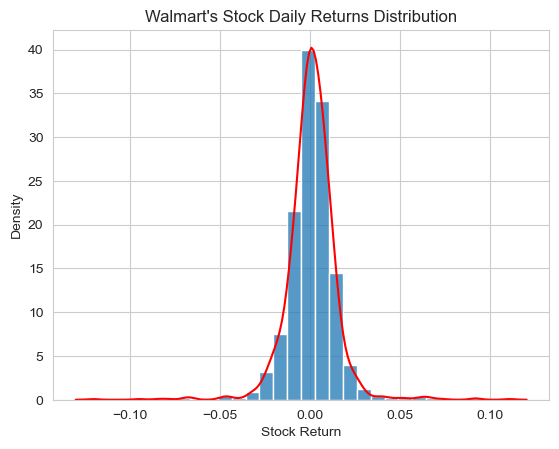

In [3]:
returns = np.log(prices / prices.shift())

sns.set_style("whitegrid")

sns.histplot(data=returns, stat="density", bins=30)
sns.kdeplot(data=returns, color="red")

plt.title("Walmart's Stock Daily Returns Distribution")
plt.xlabel('Stock Return')
plt.show()

**The distribution of a random variable, whose logarithm is normally distributed, is log-normally distributed.** The plot above proves that the logarithm of the price (return) is normally distributed. This means that the price itself is log-normally distributed.

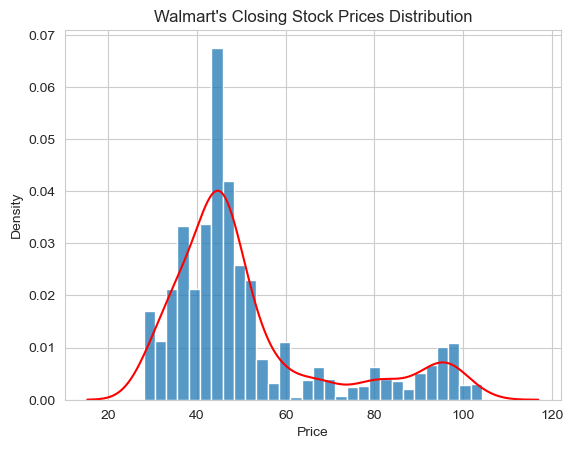

In [4]:
sns.histplot(data=prices, stat="density", bins=30)
sns.kdeplot(data=prices, color="red")

plt.title("Walmart's Closing Stock Prices Distribution")
plt.xlabel('Price')
plt.show()

Log-normal distributions have two key characteristics:

- They are **always positive**. Stocks prices are tied to real-world quantities, which means they can't be negative.
- They have a **long tail to the right**. Stock prices have a higher probability of having small changes and a small probability of large changes.

### Constant Volatility

Another assumption is that the [volatility](https://en.wikipedia.org/wiki/Volatility_(finance)) of the underlying stock is constant. A **volatility that doesn’t change over time** means that the amplitude of the moves are generally expected and known in advance.

In the real world, this is not true. Let’s use Walmart’s stock price as example again. We can calculate the volatility of a stock by taking the standard deviation of the daily returns. For each point in time we’ll take the standard deviation of the past 60 days, using a moving or rolling window method. It’s also a common practice to analyze the annualized volatility. So, we multiply it by square root of 252 (number of trading days in a year).

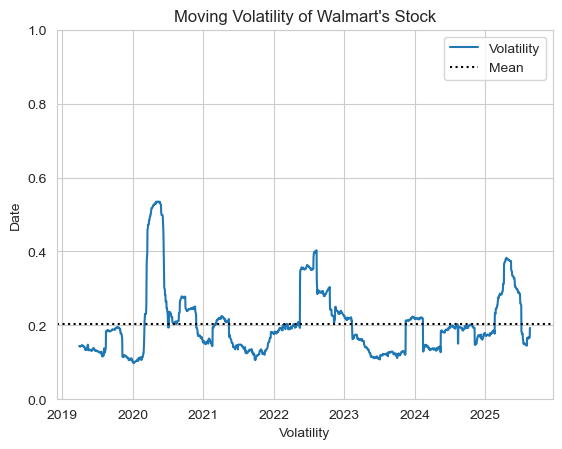

In [5]:
volatility = returns.rolling(60).std().dropna()
annualized_volatlity = volatility * np.sqrt(252)

plt.plot(annualized_volatlity, label="Volatility")
plt.axhline(annualized_volatlity.mean(), linestyle='dotted', color='black', label="Mean")
plt.ylim(0, 1)

plt.title("Moving Volatility of Walmart's Stock")
plt.xlabel('Volatility')
plt.ylabel("Date")
plt.legend()
plt.show()

As we can see the volatility does change over time. However, it seems quite stationary. To make the math within the Black-Scholes formula manageable, we aproximate the volatility to a constant value.

### No Dividends

Options have many different types of underlying assets. But, in the case of options as a derivative of a stock, the original Black-Scholes model assumes that **the underlying stock pays no dividends until maturity**. Nowadays, there are some adapted formulas to account for divindends.

## Assumptions about the Market

### No Arbitrage

The entire Black-Scholes framework is built upon the assumption of an **efficient market where no arbitrage opportunities exist**.

The [efficient-market hypothesis](https://en.wikipedia.org/wiki/Efficient-market_hypothesis) states that asset prices reflect all available information. Stocks always trade at their fair value on exchange. Therefore, the only way an investor can obtain higher returns is by purchasing riskier investments.

**An arbitrage is a trading strategy that generates a risk-free profit with no initial investment.** This principle implies that any portfolio that is constructed to be completely risk-free must earn exactly the risk-free rate of interest. 

Knowing this, Fischer Black and Myron Scholes realized that building a portfolio consisting of the underlying stock and a risk-free asset (such as borrowing or lending cash at a interest rate) perfectly replicates the financial outcome of holding the option.

Even though that in the real-world arbitrages exist, they are extremely hard to find, turning this assumption quite realistic.

### No Transaction Costs or Taxes

The market is frictionless according to the Black-Scholes model. This means that there are **no transaction costs or taxes associated with buying or selling securitites**. Commissions or bid-ask spread are also not taken into account.

### Constant Risk-Free Interest Rate

Similar to the idea of a constant volatility, the model assumes that **the [risk-free interest rate](https://en.wikipedia.org/wiki/Risk-free_rate) is constant and known throughout the life of the option**. 

The risk free rate of return is a theoretical rate in finance representing the expected return on an investment with no risk of financial loss. In the real world, no investment is truly 100% risk-free. However, the closest thing we have is the yield on government debt from a stable and creditworthy country. Depending on the country, that are different standard industry practices. 

In the U.S., the most commonly used proxy is the interest rate on U.S. Treasury securities, like T-bills, T-notes, or T-bonds. For example, if we're pricing a 3-month option, we could use the yield on a 3-month Treasury bill.

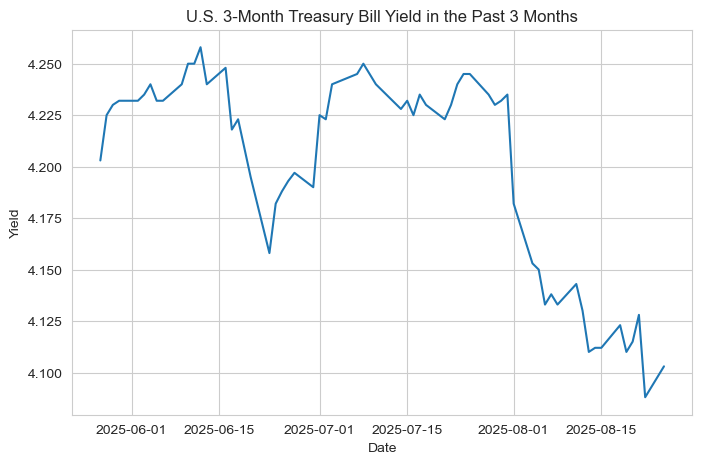

In [98]:
t_bill = yf.Ticker('^IRX').history(period="3mo")["Close"]

plt.figure(figsize=(8, 5))
plt.plot(t_bill)

plt.title("U.S. 3-Month Treasury Bill Yield in the Past 3 Months")
plt.xlabel('Date')
plt.ylabel("Yield")
plt.show()

## Assumptions about the Option

### European-Style Option

The are two types of options: American and European. An investor holding an American-style option may exercise at any time before the maturity date. In contrast, **owners of an European-style option can only exercise at the expiration date**. Even though their names suggest a regional distinction, both types of options can be traded all over the world.

The Black-Scholes is suitable exclusively to European-style options, meaning that the option being priced can only be exercised at the expiration date, not before.

# Formula

## Geometric Brownian Motion

As previously stated asset prices follow a random walk. Even though this model captures the essence of the unpredictable movements of an asset, this model consists of a series of steps in discrete-time. This makes it insufficient for the rigorous demands of derivative pricing, which requires a continuous framework. 

The mathematical bridge from a discrete random walk to a continuos-time process is the concept of Brownian Motion ($W_t$). Standard Brownian Motion is a stochastic proces characterized by three key properties:

- It starts at zero, $W_0 = 0$.
- It has independent increments, which means that the change in the process over any time interval has no bearing on what happened before.
- The increments are normally distributed, with a zero mean and a variance equal to the length of the time interval, $W_{t+s} - W=s \sim N(0, t)$.

Even though, it comes close to a proper model for a asset price, there is still one issue. This Brownian Motion model does not guarantee a positive outcome. Since the increments are normally distributed around 0, the variable could become negative, which is impossible for a limited liability, such as a stock.

Therefore, the Black-Scholes model proposes that the movements of a asset's price can be modeled with a Geometric Brownian Motion ($S_t$). While a standard Brownian Motion has random increments being added at each step, a Geometric Brownian Motion has a random growth being multiplied at each step. The key properties of a Geometrical Brownian Motion are analogous to a standard Brownian Motion:

- It starts at a positive value, $S_0 > 0$.
- It has independent multiplying factors.
- The multiplying factors at each step are log-normally distributed.
- Geometric Brownian Motion processes can never become negative.

These properties align with the assumptions of a Black-Scholes model, making it suitable to describe the movement of the underlying asset.

The dynamics of a GBM are described by a Stochastic Differential Equation (SDE):

$$dS_t = \mu S_t dt + \sigma S_t dW_t$$

This equation is composed by two parts:

1. A deterministic component ($\mu S_t dt$), called "drift". This term represents the expected return of the asset over an infinitesimal time period $dt$. The constant $\mu$, also called percentage drift, is the annualized expected rate of return.
2. A stochastic component, $\sigma S_t dW_t$, called "diffusion" or "volatility" term. This term captures the random fluctuations of the asset price. The constant $\sigma$, also called percentage volatility, is the annualized standard deviation of the asset's returns.

## Itô's Lemma

The Brownian Motion process, seen in asset's prices, is continuous everywhere but nowhere differentiable. This is due to the fact the the curve is very erratic, with a "roughness" so extreme that at no point can a unique tangent line be drawn. This caveat makes it SDE impossible to be solved by calculus' convetional means. Still, through a technique using a Taylor series expansion of an option's value, the Japanese mathematician Kiyoshi Itô was able to provide the complete differential for a stochastic function.

Given the function for the price of an option $V(S, t)$, where $S$ represents the price of the underlying asset (which is a stochastic process) and $t$ the time, by Itô's lemma:

$$dV(S,t) = (\mu S_t \frac{\partial V}{\partial S} + \frac{\partial V}{\partial t} + \frac{1}{2}\sigma^2 S^2 \frac{\partial ^ 2 V}{\partial S^2})dt + \sigma S_t \frac{\partial V}{\partial S} dW_t$$

## Black-Scholes Partial Differential Equation

Now that we have all the assumptions and the concepts from stochastic calculus, we can build the intuition behind the Black-Scholes Model equation. First, let's start with a hedged portfolio, with a self-financing strategy:

$$\Pi_t = x_t B_t + y_t S_t$$

where, in time $t$:
- $x_t$ are the units of cash invested in a cash account at a constant interest rate.
- $B_t$ is the formula for a continuously compounding interest rate, $B_t = e^{rt}$.
- $y_t$ are the units of the underlying asset.
- $S_t$ is the price of the underlying asset.

When we derive the function for the value of our portfolio, we get:

$$d\Pi_t = x_t dB_t + y_t dS_t$$

Using the SDE to describe a Geometric Brownian Motion:

$$d\Pi_t = r x_t B_t dt + y_t (\mu S_t d_t + \sigma S_t dW_t)$$
$$d\Pi_t = (r x_t B_t + y_t \mu S_t)dt + y_t \sigma S_t dW_t$$

We will build a portfolio that replicates the value of the option. This means we are looking to tune the variables $x_t$ and $y_t$, so that $\Pi_t = V_t$.

$$\Pi_t = V_t \rightarrow d\Pi_t = dv_t$$
$$\rightarrow (r x_t B_t + y_t \mu S_t)dt + y_t \sigma S_t dW_t = (\mu S_t \frac{\partial V}{\partial S} + \frac{\partial V}{\partial t} + \frac{1}{2}\sigma^2 S^2 \frac{\partial ^ 2 V}{\partial S^2})dt + \sigma S_t \frac{\partial V}{\partial S} dW_t$$

After equating the common terms of the equation above:

$$y_t = \frac{\partial V}{\partial S}$$
$$rx_tB_t = \frac{\partial V}{\partial t}+\frac{1}{2}\sigma^2 S^2\frac{\partial ^2 V}{\partial S^2}$$

Finally, we can input the two variables into our portfolio formula:

$$\Pi = V = \frac{\partial V}{\partial t}\frac{1}{r}+\frac{1}{2}\sigma^2 S^2\frac{\partial ^2 V}{\partial S^2}\frac{1}{r} + S_t\frac{\partial V}{\partial S}$$
$$\rightarrow \frac{\partial V}{\partial t}+\frac{1}{2}\sigma^2 S^2\frac{\partial ^2 V}{\partial S^2} + rS_t\frac{\partial V}{\partial S} - rV = 0$$

The equation above is known as the Black-Scholes Partial Differential Equation (PDE). It describres the relationship that must hold at all times between an option's price, the underlying stock's price, time, volatility and the risk-free rate to prevent arbitrage opportunities.

One major thing to point out is the complete absence of the drift percentage ($\mu$) in the final PDE. Even though it seems counter intuitive, the annualized expected rate of return on the asset has no influence on the option's fair value.

## Black-Scholes Formula

The solution to the Black-Scholes PDE is what is called the Black-Scholes Formula, a equation that provides the theoretical fair value of a European option. To solve this PDE, boundary conditions must be provided:

1. At the moment of expiration, the value of a call option is either 0, if the stock price falls lower than the strike price, or the stock price minus the strike price:
$$C(S, T) = max(S_t - K, 0)$$
2. If the stock price falls to zero, then the call option is worthless:
$$C(0, t) = 0\ for\ all\ t$$
3. As the stock price becomes too large, the probability of the option being exercised is close to 100%. In this case, the value of the option approaches the value of holding the stock minus the present value of paying the strike price:
$$C(S, t) \rightarrow S - Ke^{-r(T-t)}\ as\ S\rightarrow \infty$$

Surprisingly, before Fischer Black or Myron Scholes had this idea for an option pricing model, the Black-Scholes PDE had already been solved. The Black-Scholes PDE is a type of parabolic PDE that is mathematically analogous to the heat diffusion equation in physics. Price volatility behaves similar to thermal diffusitivity, and through some variable manipulations, it's possible to get to the heat diffusion equation.

The solution for a the Black-Scholes PDE gives us the price for a call option. While this solution, plus the concept of a put-call parity relationship, yields the price for a put option. The put-call parity is a principle in finance that states that the value of a porfolio consisting of a long call option and a risk-free bond, which will be worth the strike price at expiration date, is equal to the value of a portfolio containing a long put option and the underlying asset.

$$C(t) + K e^{-r(T-t)} = P(t) + S(t)$$

This idea is also based on the assumption of an efficient market, with no arbitrage opportunities. As a result, the formulas for a call and a put option according to the Black-Scholes model are:

$$C(S, t) = S_t\Phi(d_1) - e^{-r(T-t)}K\Phi (d_2)$$
$$P(S, t) = e^{-r(T-t)}K\Phi (-d_2) - S_t\Phi(-d_1)$$

where:

- $d_1 = \frac{log(\frac{S_t}{K}) + (r + \sigma^2/2)(T-t)}{\sigma \sqrt{T-t}}$
- $d_2 = d_1 - \sigma \sqrt{T-t}$
- $\sigma$ is volatility or the annualized rate of return of the underlying stock.
- $\Phi$ is the cumulative distribution function (CDF) of the standard normal distribution.
- $S_t$ is the stock price at time $t$.
- $r$ is the risk-free interest rate.
- $T$ is the option's expiration date.
- $K$ is the strike price of the option.

The $d_2$ term represents the probability that the option will expire in the money ($S_t \ge K$), which means that $\Phi(d_2)$ gives the expected value of having to pay out the strike price for a call. The component $d_1$ is a little more complex. It calculates the conditional probability of the expected value in relation to its current spot price, given that the current spot price is greater than the strike price at maturity.

The first term of the call option ($S_t \Phi(d_1)$) calculates the risk adjusted probability of the option being exercised, which occurs when the price of the underlying asset is greater than or equal to the option's strike price ($S_t \ge K$). While the second term ($e^{-r(T-t)}K\Phi (d_2)$) expresses the inverse probability of the investor not exercising the option. The component is a discounted strike price from the expiration date to the present time using risk-free rate. This can be seen as the opportunity cost of paying upfront fro the premium, instead of investing it at the risk-free rate.

### Cumulative Distribution Function (CDF)

The CDF of a variable $X$ evaluated at $x$ is the probability that $X$ will take a value less than or equal to $x$. To understand it better we can plot a standard normal distribution curve using Python.

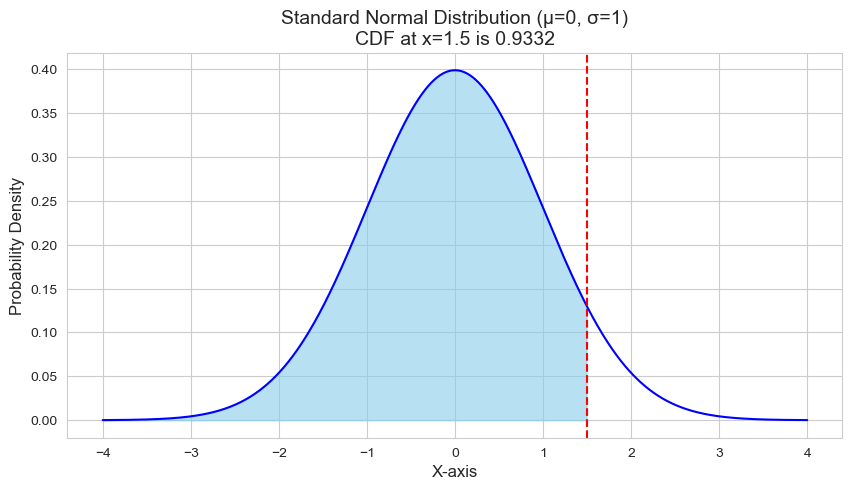

In [7]:
from scipy.stats import norm

# Standard normal distribution parameters
mu = 0  # Mean
sigma = 1  # Standard Deviation

# Point at which to calculate the CDF
x_value = 1.5

# Create a range of x values for the plot
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
# Calculate the Probability Density Function (PDF) for these x values
pdf = norm.pdf(x, mu, sigma)

# Calculate the CDF for the x_value
cdf_value = norm.cdf(x_value, mu, sigma)

# Create plot
plt.figure(figsize=(10, 5))

# Plotting the PDF curve
plt.plot(x, pdf, 'blue', label='Standard Normal PDF')

# Filling the area underneath the PDF curve until the x_value
fill_mask = x <= x_value
plt.fill_between(x[fill_mask], pdf[fill_mask], color='skyblue', alpha=0.6, label=f'Area = CDF({x_value})')

plt.axvline(x_value, color='red', linestyle='--', label=f'x = {x_value}')

# Adding Title, Labels and Grid
plt.xlabel('X-axis', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.title(f'Standard Normal Distribution (μ={mu}, σ={sigma})\nCDF at x={x_value} is {cdf_value:.4f}', fontsize=14)
plt.grid(True)

# Display Plot
plt.show()

The plot above shows the standard normal distribution PDF curve (blue) with a limit at the $x=1.5$ (red). The area underneath the PDF curve until the dashed red line is equal to the value of the CDF. So, in the example above $\Phi(1.5) = 0.9332$.

# Black-Scholes in Python

Now that we understand the formula, we'll create a function in Python to price call and put options given a specific set of inputs.

## Importing Libraries

For the maths behind the formula we'll use the `scipy` and `numpy` libraries. For generating plots we'll use the `matplotlib` and `seaborn` libraries. And we'll also use `yfinance` library to analyze some real-world data.

In [8]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

## Function

The formula for a option's price takes five variables as input: volatility ($\sigma$), strike price ($K$), current spot price ($S$), time until maturity ($T$) and the risk-free rate ($r$). The formulas for a call and a put option are as follow:

$$C = S\Phi(d_1) - e^{-rT}K\Phi (d_2)$$
$$P = e^{-rT}K\Phi (-d_2) - S_t\Phi(-d_1)$$

where:

$$d_1 = \frac{log(\frac{S}{K}) + T(r + \sigma^2/2)}{\sigma \sqrt{T}}$$
$$d_2 = d_1 - \sigma \sqrt{T}$$

For the function $\Phi$, which is a CDF for a normal distribution, we'll use the `norm.cdf()` method from the `scipy.stats` library. Besides the five variables used to calculate the option's price, we'll also include an extra input specifying the type of option: call or put.

In [9]:
def black_scholes(type, sigma, K, S, T, r):
    """"
    Applies the Black-Scholes Model to calculate the price of a option.
    """

    # Calculates parameters d_1 and d_2 from the Black-Scholes formula
    d_1 = (np.log(S / K) + T * (r + sigma ** 2 / 2)) / (sigma * np.sqrt(T))
    d_2 = d_1 - sigma * np.sqrt(T)

    # Calculates the value of the option based on its type, either "call" or "put"
    if type == "call":

        V = S * norm.cdf(d_1) - np.exp(-r * T) * K * norm.cdf(d_2)

    elif type == "put":

        V = np.exp(-r * T) * K * norm.cdf(-d_2) - S * norm.cdf(-d_1)

    return V

Let's use the function above to calculate the price of a call and a put option for a Walmart stock. 

At first, we'll calculate the price for a call option with a 3-month maturity and a strike price of $60. Since we're pricing a 3-month maturity call option, we'll use a 3-month U.S. Treasury Bill yield as our risk-free interest rate. The volatility is equal to the annualized standard deviation of the stock's logarithmic returns.

The current stock price, yield of the 3-month Treasury bill and volatility is retrieved using the `yfinance` library.

In [99]:
# Setting parameters
K = 60 # The strike price of this call option is $60
T = 3 # It will take one 3 months to expire

# Retrieves the risk-free interest rate
t_bill_3m = yf.Ticker("^IRX").history()
r = t_bill_3m["Close"].iloc[-1] / 100

# Calculates the underlying stock's volatility
prices = yf.Ticker('WMT').history(start=datetime(2019, 1, 1))['Close']
returns = np.log(prices / prices.shift())
sigma = returns.std() * np.sqrt(252)

# Retrieves the underlying stock's current price
S = prices.iloc[-1]

# Calling the function
C = black_scholes("call", sigma, K, S, T/12, r) # We divide T by 12 because r is annualized

print("-- Black-Scholes Call Option Pricing Model --")
print("Stock: Walmart (WMT)")
print(f"Current Value: ${S: .2f}")
print(f"Strike Price: $ {K}")
print(f"Time to Expiration: {T} months")
print(f"Risk-free Rate:{r*100: .2f}%")
print(f"Option Valued at: ${C: .2f}")

-- Black-Scholes Call Option Pricing Model --
Stock: Walmart (WMT)
Current Value: $ 96.54
Strike Price: $ 60
Time to Expiration: 3 months
Risk-free Rate: 4.10%
Option Valued at: $ 37.15


We can also use the `yfinance` library to get some idea of what the market is pricing this call option.

In [100]:
from datetime import timedelta

wmt = yf.Ticker("WMT")
available_dates = wmt.options

today = datetime.now()
target_date = today + timedelta(days=90) # Approximate 3 months

# Calculate the difference between each available date and the target date
closest_date = min(available_dates, key=lambda d: abs(datetime.strptime(d, "%Y-%m-%d") - target_date))

print(f"Today's Date: {today.strftime('%Y-%m-%d')}")
print(f"Closest available expiration date to 3 months from now: {closest_date}\n")

# Get the option chain for the closest date
option_chain = wmt.option_chain(closest_date)
calls = option_chain.calls

# Find the specific call option with the $60 strike price
call_option = calls[calls['strike'] == K]

print("-- Call Option Current Price --")
print("Stock: Walmart (WMT)")
print(f"Current Value: ${S: .2f}")
print(f"Strike Price: $ {K}")
print(f"Expiration Date: {closest_date}")
print(f"Risk-free Rate:{r*100: .2f}%")
print(f"Option Bid Price: ${call_option['bid'].values[0]: .2f}")
print(f"Option Ask Price: ${call_option['ask'].values[0]: .2f}")

Today's Date: 2025-08-25
Closest available expiration date to 3 months from now: 2025-11-21

-- Call Option Current Price --
Stock: Walmart (WMT)
Current Value: $ 96.54
Strike Price: $ 60
Expiration Date: 2025-11-21
Risk-free Rate: 4.10%
Option Bid Price: $ 37.20
Option Ask Price: $ 37.40


Our Black-Scholes model priced this call option at $38.57, while the current ask price is at $38.10. The ask price represents the lowest price a seller is willing to accept, which means that this is the price you would have to pay to buy the option immediately. Our model's value is slightly higher than the current ask price. This suggests two things: the model's output seems reasonable and that the option might be slightly undervalued. We could buy the call option for $38.10 now and sell it later, because we think it's true value might be $38.57.

Now, we'll try pricing a put option with a 3-month maturity and a strike price of 100. The other parameters we'll remain the same, since they are not specific to a call option.

In [101]:
# Setting Parameters
K = 100 # The strike price of this call option is $60
T = 3 # It will take one 3 months to expire

# Retrieves the risk-free interest rate
t_bill_3m = yf.Ticker("^IRX").history()
r = t_bill_3m["Close"].iloc[-1] / 100

# Calculates the underlying stock's volatility
prices = yf.Ticker('WMT').history(start=datetime(2019, 1, 1))['Close']
returns = np.log(prices / prices.shift())
sigma = returns.std() * np.sqrt(252)

# Retrieves the underlying stock's current price
S = prices.iloc[-1]

# Calling the function
P = black_scholes("put", sigma, K, S, T/12, r) # We divide T by 12 because r is annualized

print("-- Black-Scholes Put Option Pricing Model --")
print("Stock: Walmart (WMT)")
print(f"Current Value: ${S: .2f}")
print(f"Strike Price: ${K: .2f}")
print(f"Time to Expiration: {T: .2f} months")
print(f"Risk-free Rate: {r*100: .2f}%")
print(f"Option Valued at: ${P: .2f}")

-- Black-Scholes Put Option Pricing Model --
Stock: Walmart (WMT)
Current Value: $ 96.51
Strike Price: $ 100.00
Time to Expiration:  3.00 months
Risk-free Rate:  4.10%
Option Valued at: $ 5.63


In [102]:
wmt = yf.Ticker("WMT")
available_dates = wmt.options

today = datetime.now()
target_date = today + timedelta(days=90) # Approximate 3 months

# Calculate the difference between each available date and the target date
closest_date = min(available_dates, key=lambda d: abs(datetime.strptime(d, "%Y-%m-%d") - target_date))

print(f"Today's Date: {today.strftime('%Y-%m-%d')}")
print(f"Closest available expiration date to 3 months from now: {closest_date}\n")

# Get the option chain for the closest date
option_chain = wmt.option_chain(closest_date)
puts = option_chain.puts

# Find the specific put option with the $60 strike price
put_option = puts[puts['strike'] == K]

print("-- Put Option Current Price --")
print("Stock: Walmart (WMT)")
print(f"Current Value: ${S: .2f}")
print(f"Strike Price: $ {K}")
print(f"Expiration Date: {closest_date}")
print(f"Risk-free Rate:{r*100: .2f}%")
print(f"Option Bid Price: ${put_option['bid'].values[0]: .2f}")
print(f"Option Ask Price: ${put_option['ask'].values[0]: .2f}")

Today's Date: 2025-08-25
Closest available expiration date to 3 months from now: 2025-11-21

-- Put Option Current Price --
Stock: Walmart (WMT)
Current Value: $ 96.51
Strike Price: $ 100
Expiration Date: 2025-11-21
Risk-free Rate: 4.10%
Option Bid Price: $ 5.50
Option Ask Price: $ 5.60


Our Black-Scholes model priced this put option at $5.36, while the ask price is at $5.30. Our model's value is slightly higher than the current ask price. Again, this suggests that the model's output seems reasonable and that the option might be slightly undervalued. We could buy the put option for $5.30 now, because we think it's true value might be $5.36.

Nevertheless, this small discrepancy is most likely due to the approximations from the assumptions of the Black-Scholes model.

## Prices Heatmap

Another way we can visualize different option prices is by creating a grid with multiple strike prices and times to maturity. For every combination of K and T, we can calculate a call and put option. With this matrix of values we plot a heatmap, so the contrast between prices is more evident. 

In [103]:
import pandas as pd

def price_matrix(type, sigma, S, r):

    # Create two arrays of strike prices and months to maturity
    if type == 'call':
        strike_prices = np.arange(S-35, S+10, 5)
    elif type == 'put':
        strike_prices = np.arange(S-5, S+40, 5)
    months = np.arange(1, 13, 1)

    # Initialize empty matrix
    matrix = []

    for K in strike_prices:

        row = []

        for T in months:

            # Calculate option value for each K in strike_prices and T in months
            V = black_scholes(type, sigma, K, S, T/12, r)

            row.append(V)

        matrix.append(row)

    price_labels = [f'${price}' for price in np.round(strike_prices).astype(int)]

    df = pd.DataFrame(matrix, index=price_labels, columns=months)

    return df

call_df = price_matrix('call', sigma, S, r)
put_df = price_matrix('put', sigma, S, r)

Now, we plot the heatmap using the `seaborn` library.

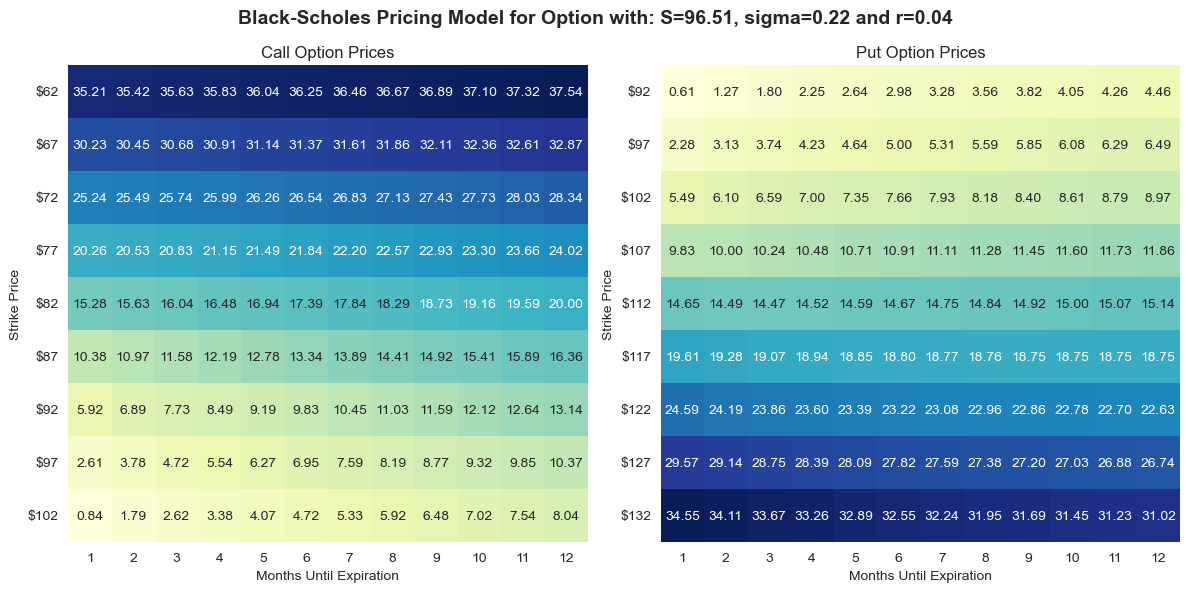

In [104]:
# Setting heatmap parameters
heatmap_params = {
    'annot': True, 
    'fmt': '.2f', 
    'cmap': "YlGnBu", 
    'cbar': False
}

dfs = {
    'Call Option Prices': call_df,
    'Put Option Prices': put_df
}

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

for ax, (title, data) in zip(axs, dfs.items()):
    sns.heatmap(data, ax=ax, **heatmap_params)
    ax.set(title=title, 
           xlabel='Months Until Expiration', 
           ylabel='Strike Price')
    ax.tick_params(axis='y', rotation=0)

fig.suptitle(f'Black-Scholes Pricing Model for Option with: S={round(S, 2)}, sigma={round(sigma, 2)} and r={round(r, 2)}', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

Let's first take a look at the call option prices. As the strike prices decrease, the call option turns more valuable. That's because investors would like to buy the stock for cheaper in the future. Now, looking at the x-axis, the options' prices increase as the months to maturity increase. If we're expecting the stock to keep increasing in value (because of a drift), the return on buying the option, for a specific strike price, also increases as the time to maturity is further away.

Next, let's analyze the put options' prices. As the strike prices increase, the put option turns more valuable. The reason for that is investors are always looking to sell their stocks for a higher value. As for the x-axis, the price drops as the maturity increases.　If we're expecting the stock to keep increasing in value, the return on selling the stock, for a specific strike price, decreases as the time to maturity is further away.